In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import talib as ta
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [2]:
#read the btc csv
df = pd.read_csv(
    Path("./Resources/BTC_USD.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
df.head()

,High,Low,Open,Close,Volume,Adj Close,50 SMA,200 SMA,10 EMA,20 EMA,RSI,value,value_classification
Date,,,,,,,,,,,,,
2018-02-01,10288.799805,8812.280273,10237.299805,9170.540039,9959400448,9170.540039,14036.866816,7856.521897,10769.754729,11614.719069,32.505630,30,Fear
2018-02-02,9142.280273,7796.490234,9142.280273,8830.750000,12726899712,8830.750000,13882.201816,7889.533597,10417.208414,11349.579157,31.214760,15,Extreme Fear
2018-02-03,9430.750000,8251.629883,8852.120117,9174.910156,7263790080,9174.910156,13711.562012,7923.813749,10191.336004,11142.467824,34.070623,40,Fear
2018-02-04,9334.870117,8031.220215,9175.700195,8277.009766,7073549824,8277.009766,13487.154199,7953.831648,9843.276688,10869.567056,30.511391,24,Extreme Fear
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,13243.443584,7974.519998,9318.184566,10496.776862,26.176396,11,Extreme Fear


In [3]:
#add our target, next days close
future_close = 1
df['Future Price'] = df['Close'].shift(future_close)
df.drop(['High', 'Low', 'Open', 'Adj Close', 'value_classification'], axis=1, inplace=True)

In [4]:
#test df
df.tail()

,Close,Volume,50 SMA,200 SMA,10 EMA,20 EMA,RSI,value,Future Price
Date,,,,,,,,,
2022-11-10,17586.771484,83202283721,19584.083730,23547.594272,19118.173558,19554.702520,38.131300,22,15880.780273
2022-11-11,17034.292969,55871616488,19536.498574,23430.474194,18739.286178,19314.663515,35.836612,25,17586.771484
2022-11-12,16799.185547,29717699419,19486.529512,23323.882817,18386.540609,19075.094185,34.874802,21,17034.292969
2022-11-13,16353.365234,27209183682,19434.856582,23209.444038,18016.872359,18815.881904,33.062715,22,16799.185547
2022-11-14,16412.138672,48737193984,19387.057402,23092.635591,17725.102598,18586.953977,33.552888,24,16353.365234


In [5]:
#copy df
future_df = df.copy()
#create data set
X = np.array(future_df[df.columns])
#remove future_close row
X = X[:len(df)-future_close]
#create target
y = np.array(df['Future Price'])
#remove future_close row
y = y[:-future_close]
#split data train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=False)


In [6]:
#create train dataframe
train_df = pd.DataFrame(X_train, columns = df.columns)
#show train
train_df.head()

,Close,Volume,50 SMA,200 SMA,10 EMA,20 EMA,RSI,value,Future Price
0,9170.540039,9.959400e+09,14036.866816,7856.521897,10769.754729,11614.719069,32.505630,30.0,NaN
1,8830.750000,1.272690e+10,13882.201816,7889.533597,10417.208414,11349.579157,31.214760,15.0,9170.540039
2,9174.910156,7.263790e+09,13711.562012,7923.813749,10191.336004,11142.467824,34.070623,40.0,8830.750000
3,8277.009766,7.073550e+09,13487.154199,7953.831648,9843.276688,10869.567056,30.511391,24.0,9174.910156
4,6955.270020,9.285290e+09,13243.443584,7974.519998,9318.184566,10496.776862,26.176396,11.0,8277.009766


In [7]:
#create test dataframe
test_df = pd.DataFrame(X_test, columns = future_df.columns)
#show data
test_df.head()

,Close,Volume,50 SMA,200 SMA,10 EMA,20 EMA,RSI,value,Future Price
0,39214.218750,2.654560e+10,40435.970859,49283.407910,39268.057630,40017.743043,45.736592,27.0,38332.609375
1,39105.148438,1.746755e+10,40386.915781,49251.008496,39238.437777,39930.829271,45.356934,26.0,39214.218750
2,37709.785156,2.345013e+10,40306.432656,49211.589238,38960.500937,39719.301260,40.702034,26.0,39105.148438
3,43193.234375,3.569001e+10,40332.065313,49205.413965,39730.088835,40050.152033,58.658017,20.0,37709.785156
4,44354.636719,3.247905e+10,40382.732812,49188.220547,40570.915723,40460.102956,61.328984,51.0,43193.234375


In [8]:
#setup the model
regression_setup = setup(data = train_df, target = 'Future Price', session_id = 1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,Future Price
2,Original Data,"(1482, 9)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1036, 6)"


In [9]:
#test models by r2, sorted by r2 initially but many tied at .9969, filtered by MAE to pick the best of those
best_model = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,372.9958,459901.0745,652.2400,0.9986,0.0293,0.0200,0.8450
catboost,CatBoost Regressor,450.5511,592401.0005,752.9531,0.9982,0.0365,0.0264,1.2590
rf,Random Forest Regressor,455.5058,716574.2515,815.1133,0.9978,0.0347,0.0235,0.7960
lightgbm,Light Gradient Boosting Machine,476.2818,749979.2694,839.1042,0.9977,0.0357,0.0250,0.0920
gbr,Gradient Boosting Regressor,497.3539,706887.5505,823.5377,0.9979,0.0384,0.0277,0.1280
xgboost,Extreme Gradient Boosting,521.5132,871132.3344,912.0522,0.9974,0.0384,0.0271,0.5380
dt,Decision Tree Regressor,623.5924,1373178.9170,1163.1694,0.9958,0.0481,0.0322,0.0080
br,Bayesian Ridge,861.6202,1650402.9020,1270.3466,0.9950,0.0818,0.0594,0.0060
en,Elastic Net,865.1680,1649738.1125,1270.1985,0.9950,0.0835,0.0602,0.0070
lasso,Lasso Regression,865.5455,1649742.9750,1270.2125,0.9950,0.0837,0.0603,0.0070


In [10]:
#create model
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,410.7437,733671.3441,856.5462,0.9977,0.0323,0.0216
1,475.0703,675532.3237,821.9077,0.9982,0.0307,0.0223
2,354.4466,457882.3679,676.6701,0.9984,0.0383,0.0211
3,519.7804,951849.2314,975.6276,0.9970,0.0324,0.0239
4,300.1488,313190.5210,559.6343,0.9992,0.0267,0.0167
5,275.1150,214386.6685,463.0191,0.9991,0.0263,0.0184
6,298.7205,270140.0120,519.7500,0.9992,0.0275,0.0179
7,285.5861,216320.1260,465.1023,0.9994,0.0212,0.0150
8,284.7928,169641.7837,411.8759,0.9994,0.0256,0.0190
9,525.5538,596396.3670,772.2670,0.9984,0.0322,0.0241


In [11]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
#test the predictions
btc_predictions = predict_model(model, data=test_df)
#print
btc_predictions

,Close,Volume,50 SMA,200 SMA,10 EMA,20 EMA,RSI,value,Future Price,Label
0,39214.218750,2.654560e+10,40435.970859,49283.407910,39268.057630,40017.743043,45.736592,27.0,38332.609375,39397.757773
1,39105.148438,1.746755e+10,40386.915781,49251.008496,39238.437777,39930.829271,45.356934,26.0,39214.218750,38857.353438
2,37709.785156,2.345013e+10,40306.432656,49211.589238,38960.500937,39719.301260,40.702034,26.0,39105.148438,38394.779453
3,43193.234375,3.569001e+10,40332.065313,49205.413965,39730.088835,40050.152033,58.658017,20.0,37709.785156,38727.580664
4,44354.636719,3.247905e+10,40382.732812,49188.220547,40570.915723,40460.102956,61.328984,51.0,43193.234375,43545.796562
...,...,...,...,...,...,...,...,...,...,...
257,15880.780273,1.029052e+11,19603.296309,23657.006880,19458.485130,19761.853155,24.217638,29.0,18541.271484,26435.125381
258,17586.771484,8.320228e+10,19584.083730,23547.594272,19118.173558,19554.702520,38.131300,22.0,15880.780273,26335.846416
259,17034.292969,5.587162e+10,19536.498574,23430.474194,18739.286178,19314.663515,35.836612,25.0,17586.771484,25715.064717
260,16799.185547,2.971770e+10,19486.529512,23323.882817,18386.540609,19075.094185,34.874802,21.0,17034.292969,24990.181006


<AxesSubplot:>

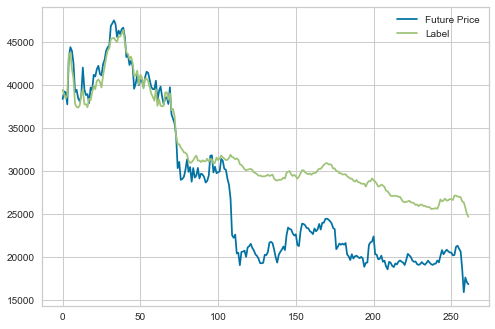

In [15]:
btc_predictions.drop(['Volume', '50 SMA', '200 SMA', '10 EMA', '20 EMA', 'RSI', 'value', 'Close'], axis=1, inplace=True)
btc_predictions.plot()